In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd 
import seaborn as sns 
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [49]:
#Read in cleaned 2019 and 2021 Dataframes

clean_2019 = pd.read_csv('mydata/MMSA2019_Cleaned.csv')
clean_2021 = pd.read_csv('mydata/MMSA2021_Cleaned.csv')

### EXPLORATORY DATA ANALYSIS

In [ ]:
processed_features_df.describe([0.25,0.50,0.75,0.99]).T

In [ ]:
# Replace outliers with the 99 percentile value except weight column

num_cols = processed_features_df.select_dtypes(include=('float','int')).columns
num_cols = list(num_cols)
for i in ['_MMSA','_MMSAWT','_STSTR']:
    num_cols.remove(i)

for i in num_cols:
    percentile_99 = np.percentile(processed_features_df[i], 99)
    processed_features_df.loc[processed_features_df[i] > percentile_99, i] = percentile_99


In [ ]:
processed_features_df.describe([0.25,0.50,0.75,0.99]).T

<Axes: >

<Figure size 1200x800 with 0 Axes>

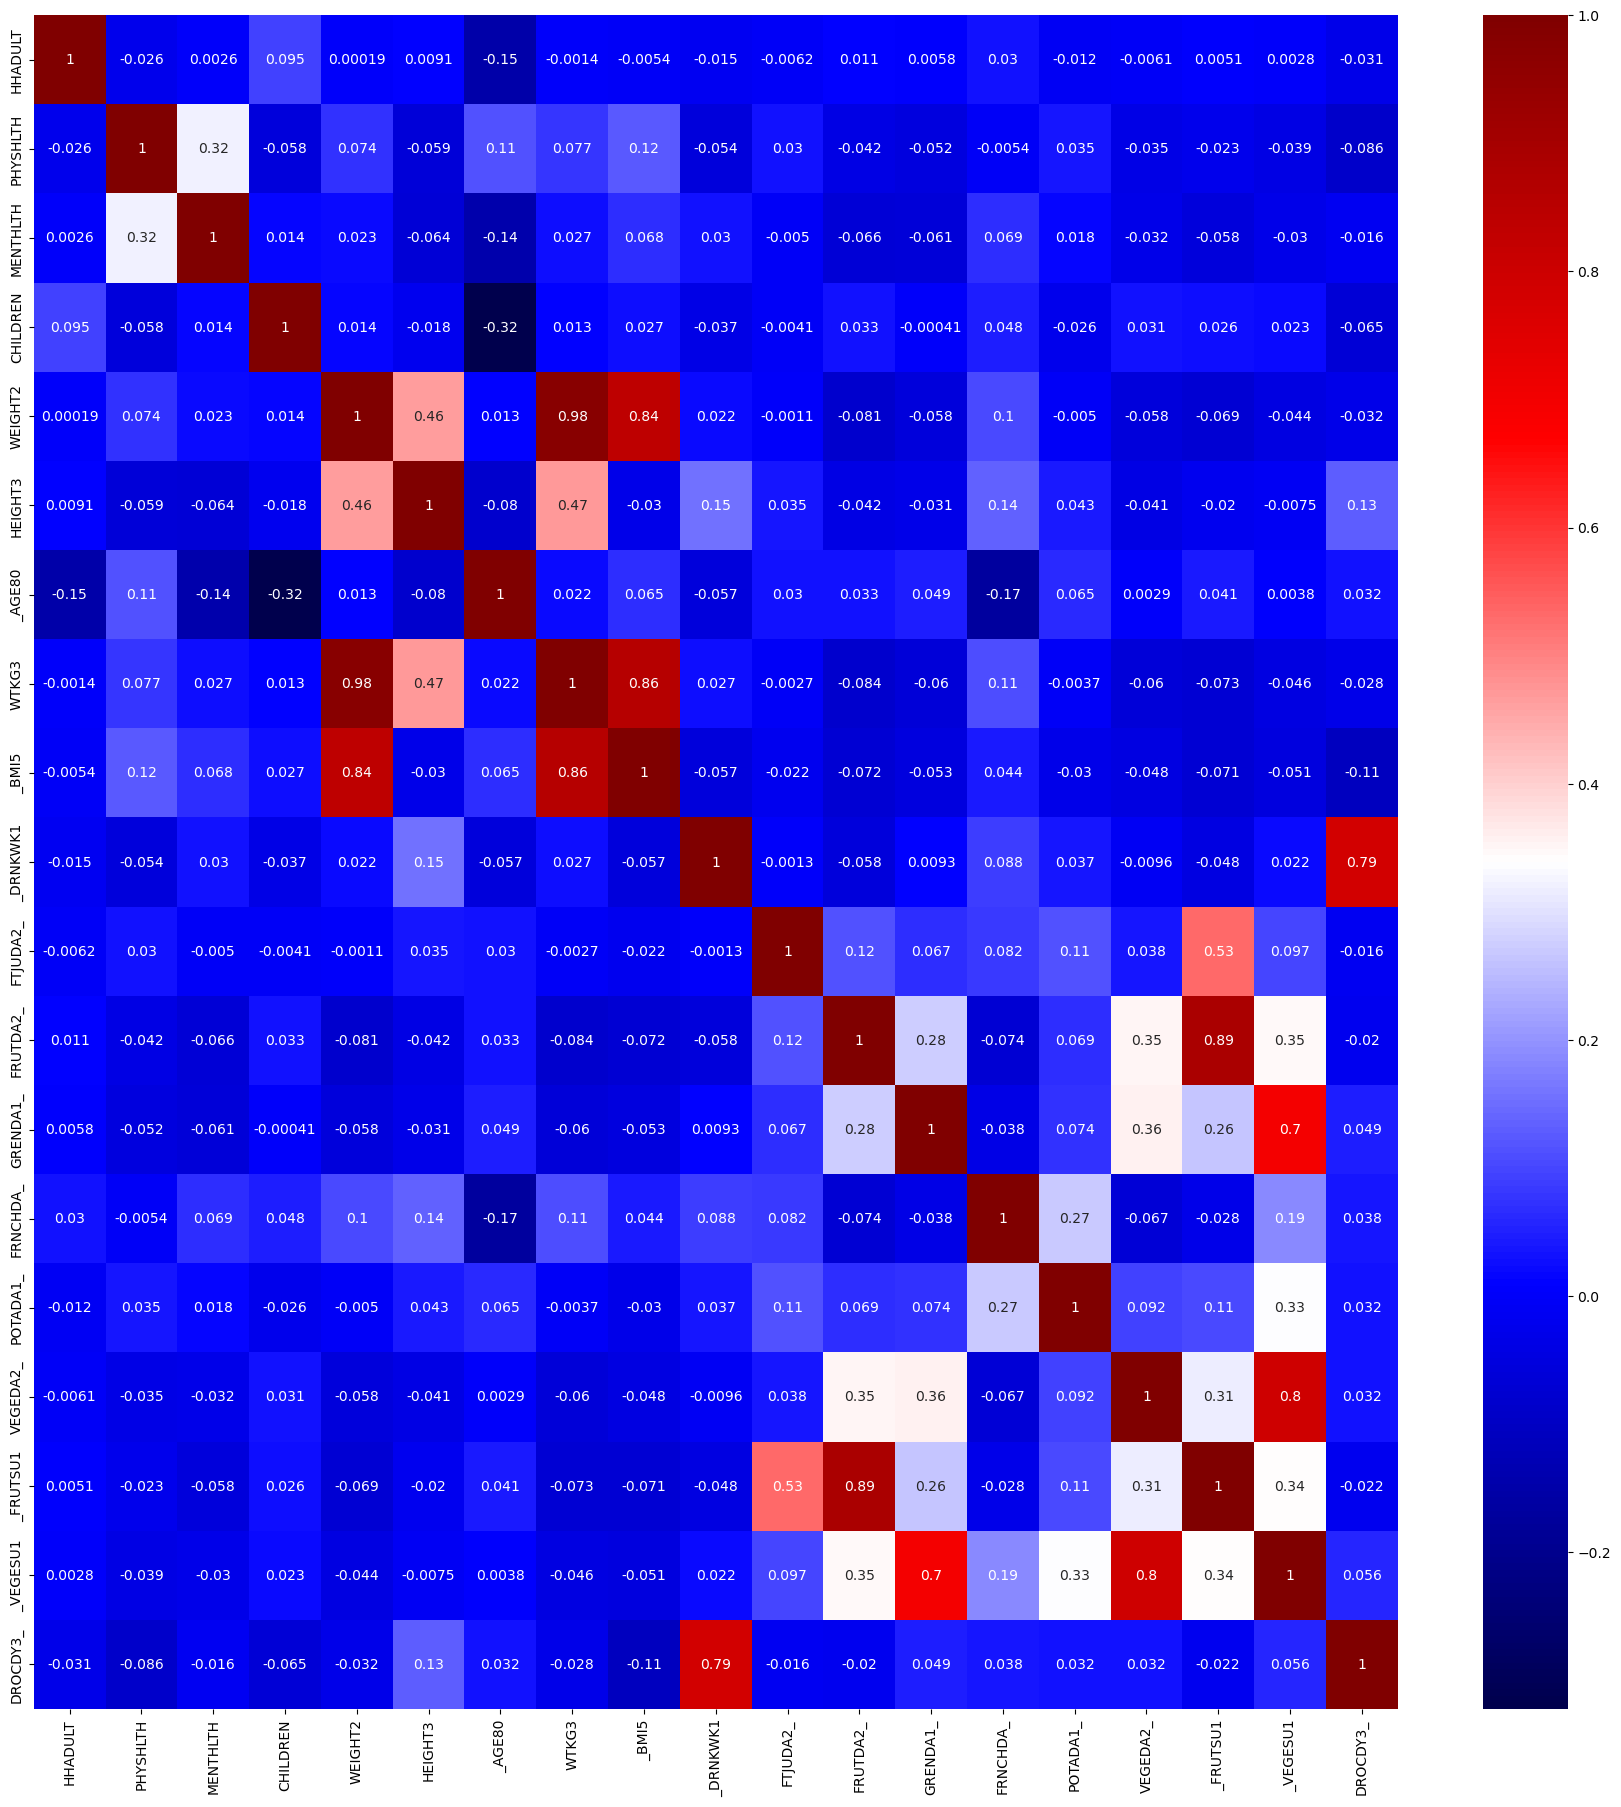

In [50]:
#Chesk for correlation between the numeric vairbales 
plt.figure(figsize=(12,8))
plt.figure(figsize=(22,22))
sns.heatmap(processed_features_df[num_cols].corr(),cmap='seismic',annot=True)

- We can see the presence of significant multicolinearity between the fruits and vegetable columns, which we will
look to remove further down the line 

In [51]:
num_cols = processed_features_df.select_dtypes(include=('float','int')).columns
cat_cols = processed_features_df.select_dtypes(exclude=('float','int')).columns

In [52]:
#here we want to print out the value count in eah categorical column

# normalize used to get the percentage 
for i in list(cat_cols):
    print(processed_features_df[i].value_counts(normalize=True))
    print('**********************************')

1100    0.881594
1200    0.118406
Name: DISPCODE, dtype: float64
**********************************
female    0.505767
male      0.494233
Name: SEXVAR, dtype: float64
**********************************
very good    0.349527
good         0.303803
excellent    0.187749
fair         0.121698
poor         0.037223
Name: GENHLTH, dtype: float64
**********************************
yes    0.909365
no     0.090635
Name: _HLTHPLN, dtype: float64
**********************************
no     0.879619
yes    0.120381
Name: MEDCOST1, dtype: float64
**********************************
1 year      0.772582
2 years     0.107860
5 years     0.058221
>5 years    0.049509
unknown     0.006596
never       0.005232
Name: CHECKUP1, dtype: float64
**********************************
no     0.95972
yes    0.04028
Name: CVDINFR4, dtype: float64
**********************************
no     0.959144
yes    0.040856
Name: CVDCRHD4, dtype: float64
**********************************
no     0.967774
yes    0.032226
Name: CVD

In [53]:
num_cols

Index(['HHADULT', 'PHYSHLTH', 'MENTHLTH', 'CHILDREN', 'WEIGHT2', 'HEIGHT3',
       '_STSTR', '_AGE80', 'WTKG3', '_BMI5', '_DRNKWK1', 'FTJUDA2_',
       'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_', 'VEGEDA2_', '_FRUTSU1',
       '_VEGESU1', '_MMSA', '_MMSAWT', 'DROCDY3_'],
      dtype='object')

In [54]:
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [55]:
#lets create a new data frame with only dummmy categorical data and num columns 

dummies_df = processed_features_df[num_cols]
cat_cols = list(cat_cols)

for i in ['GENHLTH','_RFHLTH']:
    cat_cols.remove(i)


for i in cat_cols:
    temp = pd.get_dummies(processed_features_df[i],drop_first=True,prefix=i)
    dummies_df = pd.concat([dummies_df,temp],axis=1)

dummies_df.head()

,HHADULT,PHYSHLTH,MENTHLTH,CHILDREN,WEIGHT2,HEIGHT3,_STSTR,_AGE80,WTKG3,_BMI5,...,STATE_South Carolina,STATE_South Dakota,STATE_Tennessee,STATE_Texas,STATE_Utah,STATE_Vermont,STATE_Virginia,STATE_Washington,STATE_West Virginia,STATE_Wisconsin
0,2.0,0.0,0.0,3.0,180.0,1.7780,16049,35,81.65,25.83,...,0,1,0,0,0,0,0,0,0,0
1,3.0,20.0,0.0,0.0,265.0,1.8034,16049,42,120.20,36.96,...,0,1,0,0,0,0,0,0,0,0
2,1.0,1.0,0.0,0.0,170.0,1.7272,16049,22,77.11,25.85,...,0,1,0,0,0,0,0,0,0,0
3,2.0,0.0,0.0,4.0,280.0,1.8288,16039,38,127.01,37.97,...,0,1,0,0,0,0,0,0,0,0
4,2.0,0.0,0.0,0.0,270.0,1.9304,16049,72,122.47,32.87,...,0,1,0,0,0,0,0,0,0,0


In [57]:
dummies_df.columns = dummies_df.columns.astype(str)
processed_features_df.columns = processed_features_df.columns.astype(str)

In [58]:
X = dummies_df
y = processed_features_df['_RFHLTH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [60]:
feature_importances = sel.estimator_.feature_importances_


In [61]:
import pandas as pd

features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
features = features.sort_values(by='Importance', ascending=False)
feat_50 = features.head(50)

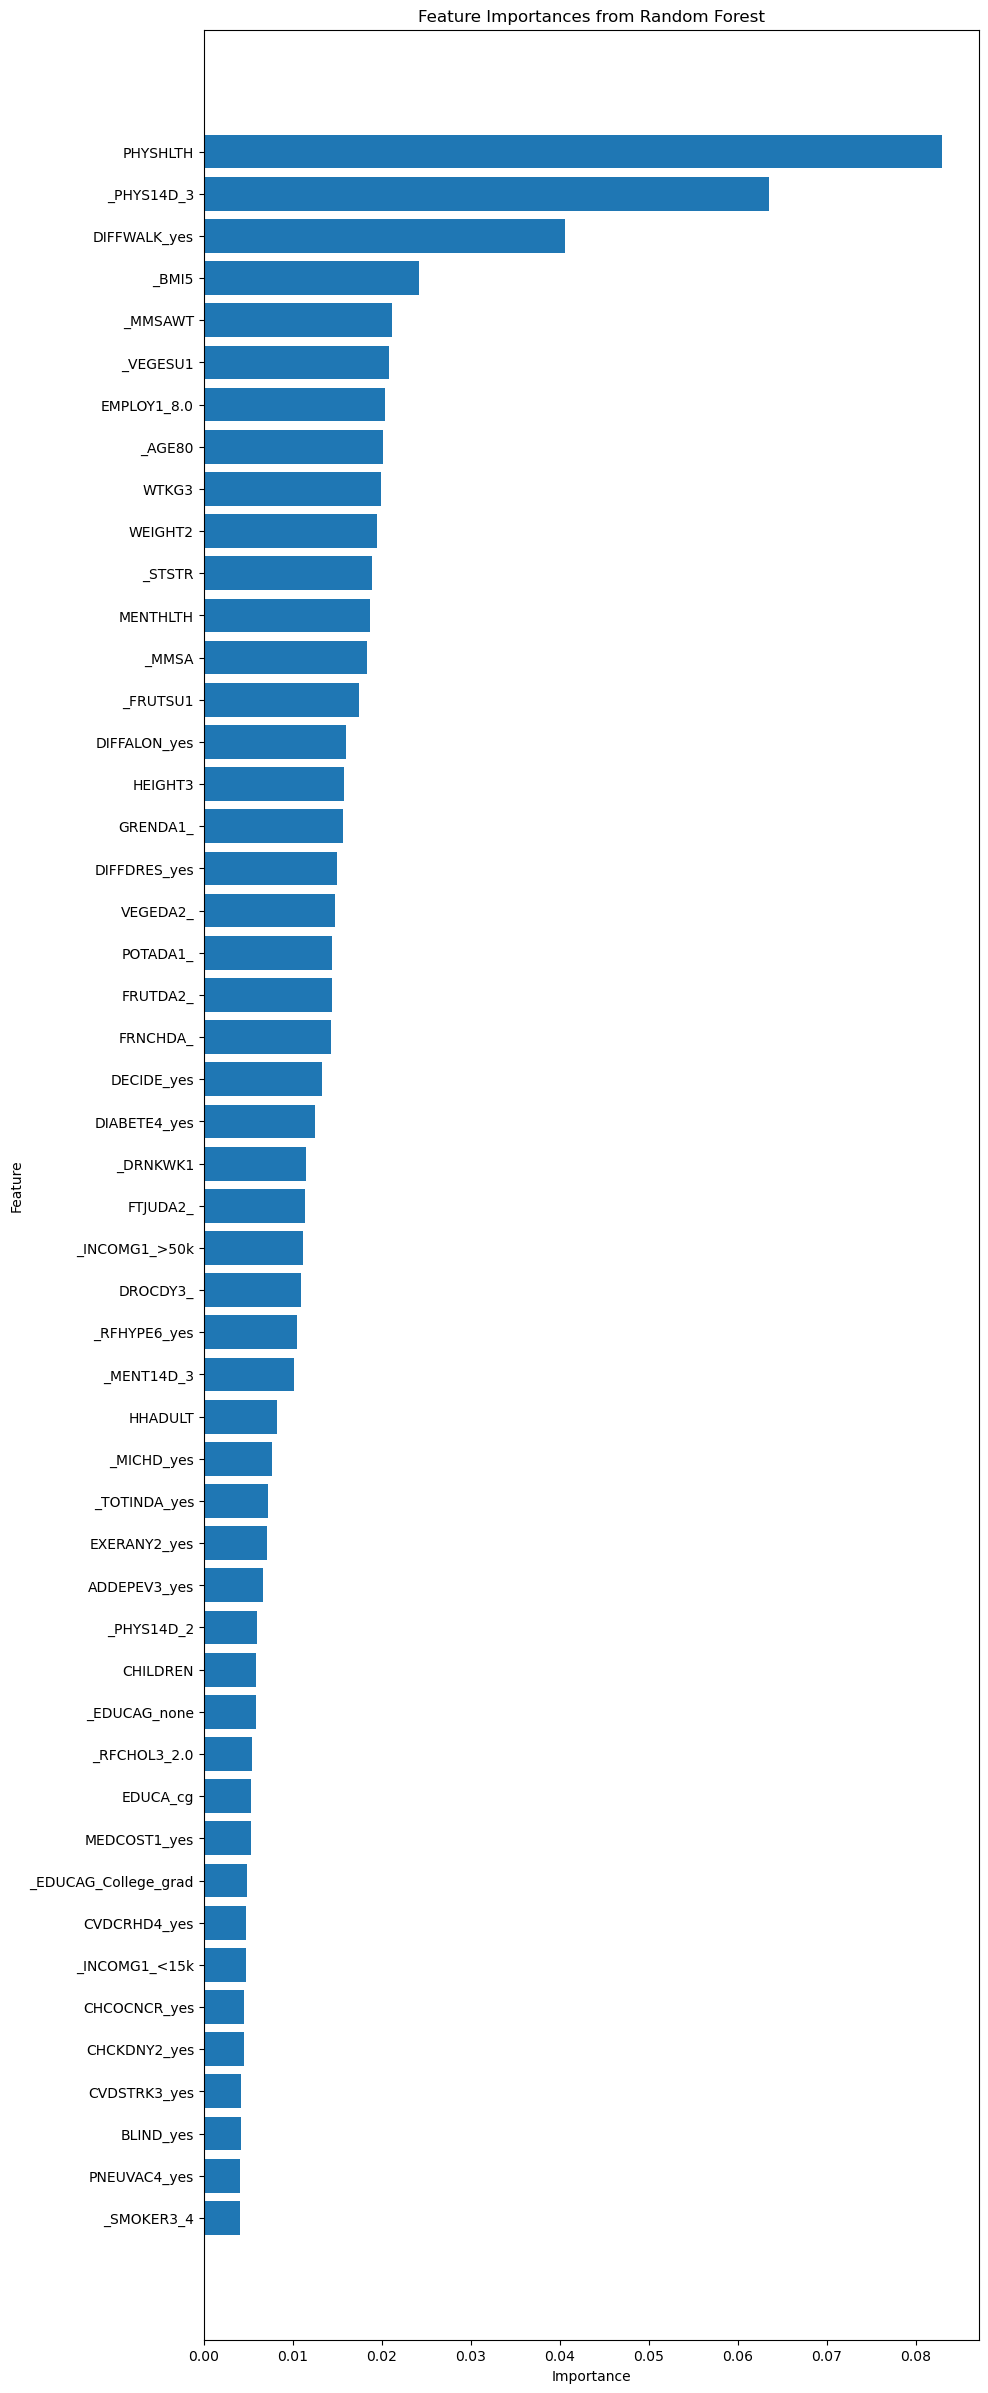

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 30))
plt.barh(feat_50['Feature'], feat_50['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.title('Feature Importances from Random Forest')
plt.show()


In [63]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

57

In [64]:
selected_feat

Index(['HHADULT', 'PHYSHLTH', 'MENTHLTH', 'CHILDREN', 'WEIGHT2', 'HEIGHT3',
       '_STSTR', '_AGE80', 'WTKG3', '_BMI5', '_DRNKWK1', 'FTJUDA2_',
       'FRUTDA2_', 'GRENDA1_', 'FRNCHDA_', 'POTADA1_', 'VEGEDA2_', '_FRUTSU1',
       '_VEGESU1', '_MMSA', '_MMSAWT', 'DROCDY3_', 'MEDCOST1_yes',
       'CVDCRHD4_yes', 'CVDSTRK3_yes', 'CHCOCNCR_yes', 'ADDEPEV3_yes',
       'CHCKDNY2_yes', 'DIABETE4_yes', 'EDUCA_cg', 'RENTHOM1_own',
       'RENTHOM1_rent', 'EMPLOY1_8.0', 'BLIND_yes', 'DECIDE_yes',
       'DIFFWALK_yes', 'DIFFDRES_yes', 'DIFFALON_yes', 'SMOKE100_yes',
       'EXERANY2_yes', 'FLUSHOT7_yes', 'PNEUVAC4_yes', '_PHYS14D_2',
       '_PHYS14D_3', '_MENT14D_3', '_RFHYPE6_yes', '_RFCHOL3_2.0',
       '_MICHD_yes', '_BMI5CAT_4.0', '_EDUCAG_College_grad', '_EDUCAG_none',
       '_INCOMG1_<15k', '_INCOMG1_>50k', '_SMOKER3_4', 'DRNKANY5_2',
       '_TOTINDA_yes', '_AIDTST4_2.0'],
      dtype='object')

In [65]:
X = processed_features_df.drop(columns=['GENHLTH','_RFHLTH'])
y = processed_features_df['_RFHLTH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
# Convert category columns from object to category
for col in X_train.select_dtypes(['object']):
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

[LightGBM] [Info] Number of positive: 9460, number of negative: 50078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2653
[LightGBM] [Info] Number of data points in the train set: 59538, number of used features: 95
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158890 -> initscore=-1.666509
[LightGBM] [Info] Start training from score -1.666509


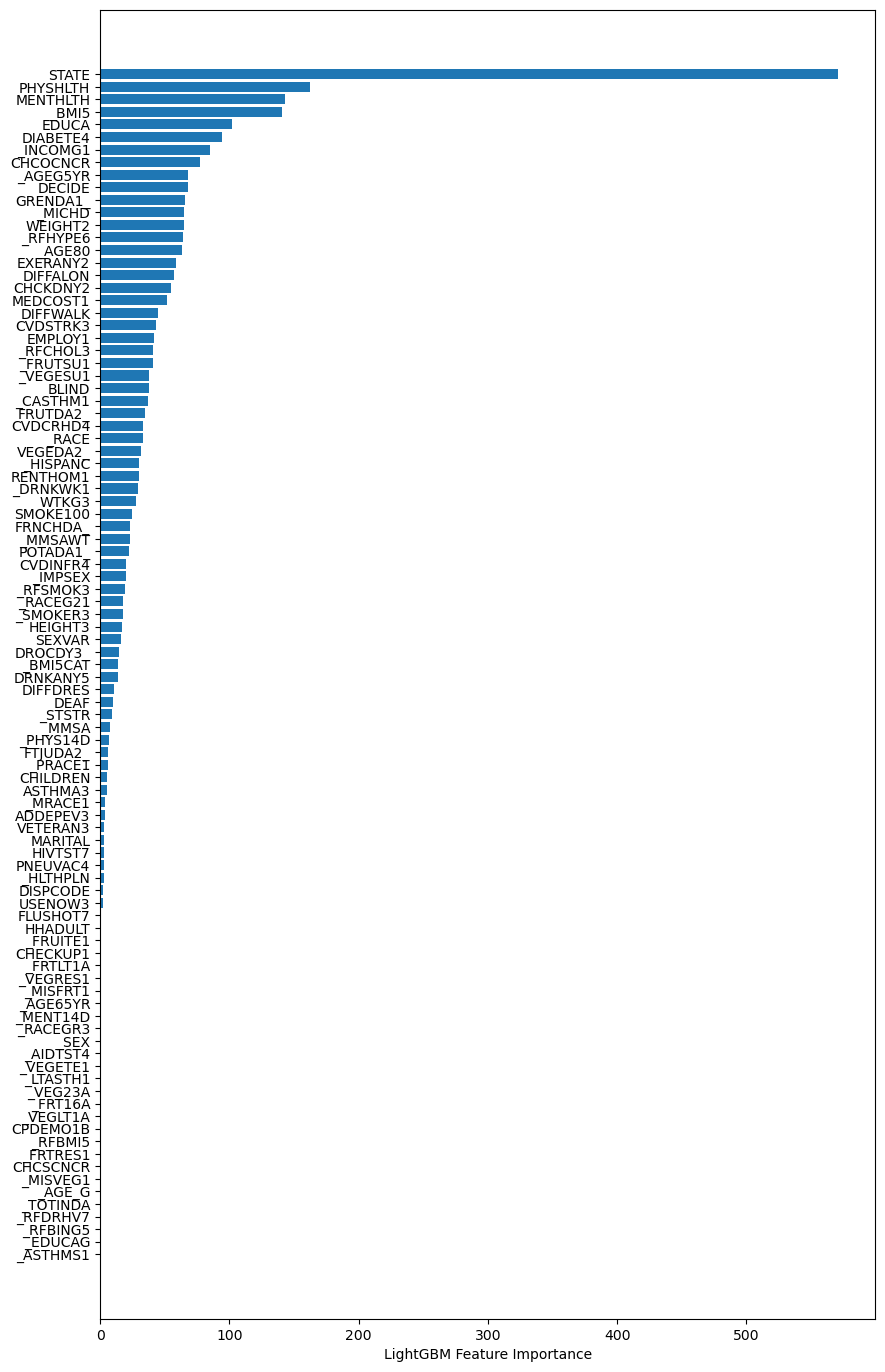

In [67]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(objective='binary', num_leaves=31, learning_rate=0.05, n_estimators=100)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Plot feature importances
features = X_train.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 17))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.xlabel("LightGBM Feature Importance")
plt.show()

In [68]:
# Number of top features
n = 45

# Get the indices of the top n features
top_indices = importances.argsort()[-n:][::-1]

# Display the top n features and their importances
top_features = features[top_indices]
top_importances = importances[top_indices]

for feature, importance in zip(top_features, top_importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: STATE, Importance: 571
Feature: PHYSHLTH, Importance: 162
Feature: MENTHLTH, Importance: 143
Feature: _BMI5, Importance: 141
Feature: EDUCA, Importance: 102
Feature: DIABETE4, Importance: 94
Feature: _INCOMG1, Importance: 85
Feature: CHCOCNCR, Importance: 77
Feature: _AGEG5YR, Importance: 68
Feature: DECIDE, Importance: 68
Feature: GRENDA1_, Importance: 66
Feature: _MICHD, Importance: 65
Feature: WEIGHT2, Importance: 65
Feature: _RFHYPE6, Importance: 64
Feature: _AGE80, Importance: 63
Feature: EXERANY2, Importance: 59
Feature: DIFFALON, Importance: 57
Feature: CHCKDNY2, Importance: 55
Feature: MEDCOST1, Importance: 52
Feature: DIFFWALK, Importance: 45
Feature: CVDSTRK3, Importance: 43
Feature: EMPLOY1, Importance: 42
Feature: _RFCHOL3, Importance: 41
Feature: _FRUTSU1, Importance: 41
Feature: _VEGESU1, Importance: 38
Feature: BLIND, Importance: 38
Feature: _CASTHM1, Importance: 37
Feature: FRUTDA2_, Importance: 35
Feature: CVDCRHD4, Importance: 33
Feature: _RACE, Importance: 3

In [69]:
#Lets look at the categorical features in the top n features
categorical_top_features = [feature for feature in top_features if X_train[feature].dtype == 'category']
for feature, importance in zip(categorical_top_features, top_importances):
    print(f"Cat feature: {feature}, Importance: {importance}")

Cat feature: STATE, Importance: 571
Cat feature: EDUCA, Importance: 162
Cat feature: DIABETE4, Importance: 143
Cat feature: _INCOMG1, Importance: 141
Cat feature: CHCOCNCR, Importance: 102
Cat feature: _AGEG5YR, Importance: 94
Cat feature: DECIDE, Importance: 85
Cat feature: _MICHD, Importance: 77
Cat feature: _RFHYPE6, Importance: 68
Cat feature: EXERANY2, Importance: 68
Cat feature: DIFFALON, Importance: 66
Cat feature: CHCKDNY2, Importance: 65
Cat feature: MEDCOST1, Importance: 65
Cat feature: DIFFWALK, Importance: 64
Cat feature: CVDSTRK3, Importance: 63
Cat feature: EMPLOY1, Importance: 59
Cat feature: _RFCHOL3, Importance: 57
Cat feature: BLIND, Importance: 55
Cat feature: _CASTHM1, Importance: 52
Cat feature: CVDCRHD4, Importance: 45
Cat feature: _RACE, Importance: 43
Cat feature: _HISPANC, Importance: 42
Cat feature: RENTHOM1, Importance: 41
Cat feature: SMOKE100, Importance: 41
Cat feature: CVDINFR4, Importance: 38
Cat feature: _IMPSEX, Importance: 38
Cat feature: _RFSMOK3, Im